In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
X = x[:, :2]

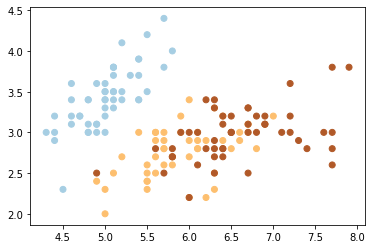

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Paired")

### 可以看出取前兩欄以圖示難以分群
### 試其他欄加入

In [11]:
X = x[:, :4]

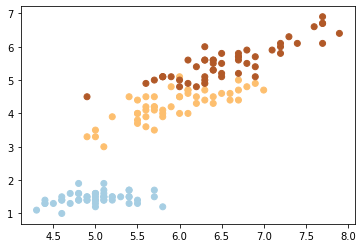

In [12]:
plt.scatter(X[:, 0], X[:, 2], c=y, cmap="Paired")

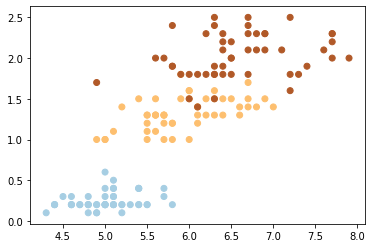

In [13]:
plt.scatter(X[:, 0], X[:, 3], c=y, cmap="Paired")

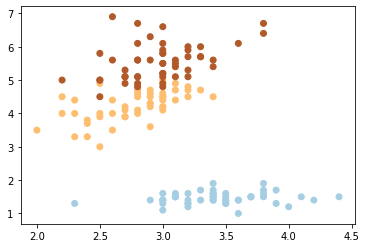

In [14]:
plt.scatter(X[:, 1], X[:, 2], c=y, cmap="Paired")

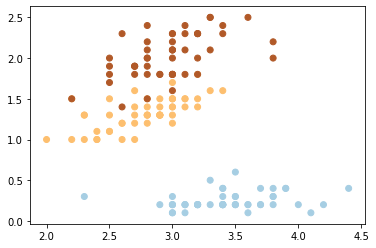

In [15]:
plt.scatter(X[:, 1], X[:, 3], c=y, cmap="Paired")

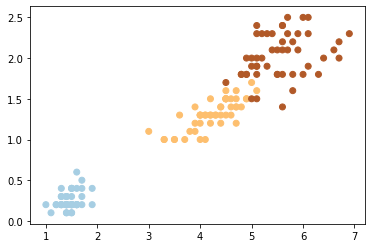

In [16]:
plt.scatter(X[:, 2], X[:, 3], c=y, cmap="Paired")

## 以分類為目標
## 我希望組內間距越小
## 組間差距越大
# 故選擇 第二 三 欄建立模型
# 不增加欄位數不增加模型的複雜度

In [20]:
X = x[:, [2,3]]

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [32]:
from sklearn.svm import SVC 

In [33]:
# gamma 控制建模時對當前資料的解釋力，但是解釋過高有時造成 Overfitted 的問題影響預測新資料的能力

clf = SVC(gamma=0.6)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
x_train.min()

0.1

In [35]:
x_train.max()

6.9

In [36]:
y_train.min()

0

In [37]:
y_train.max()

2

In [39]:
xx = np.arange(0.1, 7, 0.02)
yy = np.arange(0, 3, 0.02)

In [40]:
xm, ym = np.meshgrid(xx,yy)
P = np.c_[xm.ravel(),ym.ravel()]


In [41]:
z = clf.predict(P)
Z = z.reshape(xm.shape)

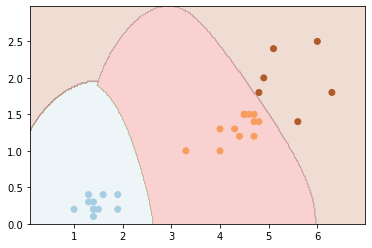

In [42]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
plt.contourf(xm, ym, Z,cmap='Paired',alpha=0.2)